In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, roc_curve
from sklearn.preprocessing import StandardScaler

In [39]:
data = pd.read_csv('data_final.csv')
data.head()

,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,NOK,CHI,WAS,NJN,SAS,POR,LAC,DAL,TOR,TOT
0,Jaren Jackson Jr.,19,58,56.0,1515,298,589,0.506,51,142,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Noah Vonleh,19,25,0.0,259,30,76,0.395,5,13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Jayson Tatum,19,80,80.0,2443,397,835,0.475,105,242,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Markelle Fultz,19,14,0.0,253,45,111,0.405,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Maurice Harkless,19,76,59.0,1974,260,564,0.461,32,117,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
data.columns

Index(['Player', 'Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA',
       '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF_x', 'PTS', 'target', 'PF_y',
       'SF', 'SG', 'C', 'PG', 'SG-SF', 'PF-SF', 'SG-PG', 'SF-PF', 'PF-C',
       'C-PF', 'MEM', 'CHA', 'BOS', 'PHI', 'ORL', 'MIA', 'MIN', 'OKC', 'HOU',
       'UTA', 'SAC', 'GSW', 'LAL', 'NYK', 'DET', 'MIL', 'IND', 'DEN', 'ATL',
       'CLE', 'PHO', 'NOK', 'CHI', 'WAS', 'NJN', 'SAS', 'POR', 'LAC', 'DAL',
       'TOR', 'TOT'],
      dtype='object')

In [41]:
data['target'].value_counts()

target
1    968
0    564
Name: count, dtype: int64

<Axes: xlabel='target'>

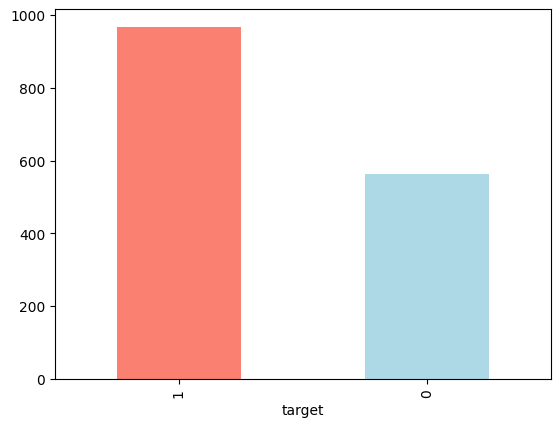

In [42]:
data['target'].value_counts().plot(kind='bar', color=['salmon', 'lightblue'])

## Normalizar

In [43]:
jugadores = data.pop('Player')

data_norm = data[['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA',
       '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF_x', 'PTS']]

scaler = StandardScaler()
data_norm = pd.DataFrame(scaler.fit_transform(data_norm), columns=data_norm.columns)

In [44]:
data_norm[['PF_y','SF', 'SG', 'C', 'PG', 'SG-SF', 'PF-SF', 'SG-PG', 'SF-PF', 'PF-C',
       'C-PF', 'MEM', 'CHA', 'BOS', 'PHI', 'ORL', 'MIA', 'MIN', 'OKC', 'HOU',
       'UTA', 'SAC', 'GSW', 'LAL', 'NYK', 'DET', 'MIL', 'IND', 'DEN', 'ATL',
       'CLE', 'PHO', 'NOK', 'CHI', 'WAS', 'NJN', 'SAS', 'POR', 'LAC', 'DAL',
       'TOR', 'TOT']] = data[['PF_y','SF', 'SG', 'C', 'PG', 'SG-SF', 'PF-SF', 'SG-PG', 'SF-PF', 'PF-C',
                            'C-PF', 'MEM', 'CHA', 'BOS', 'PHI', 'ORL', 'MIA', 'MIN', 'OKC', 'HOU',
                            'UTA', 'SAC', 'GSW', 'LAL', 'NYK', 'DET', 'MIL', 'IND', 'DEN', 'ATL',
                            'CLE', 'PHO', 'NOK', 'CHI', 'WAS', 'NJN', 'SAS', 'POR', 'LAC', 'DAL',
                            'TOR', 'TOT']]

target = data['target']

In [45]:
data_norm

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,NOK,CHI,WAS,NJN,SAS,POR,LAC,DAL,TOR,TOT
0,-2.375788,0.279595,1.775700,0.725026,1.115158,0.888469,0.693095,1.314143,1.257404,0.659583,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-2.375788,-1.079038,-0.672487,-0.886156,-0.820420,-0.816747,-0.251170,-0.357764,-0.429904,0.721545,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-2.375788,1.185350,2.824923,1.915453,1.830166,1.706176,0.429381,3.276816,2.565395,0.838318,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-2.375788,-1.531915,-0.672487,-0.893853,-0.712085,-0.700407,-0.166101,-0.539493,-0.586863,-0.195963,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-2.375788,1.020668,1.906853,1.313825,0.840710,0.805369,0.310285,0.623572,0.930407,0.457016,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1527,3.106879,-0.255624,-0.541334,-0.859218,-0.719308,-0.717027,-0.081032,-0.539493,-0.599943,-2.579100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1528,3.106879,0.073742,-0.672487,-0.728373,-0.610973,-0.584067,-0.174608,0.078385,0.197932,0.468932,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1529,3.106879,-0.626160,-0.366463,-0.551349,-0.430415,-0.421190,0.055078,-0.503147,-0.573783,0.995605,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1530,3.106879,1.226521,0.726477,0.741702,0.017367,0.104003,-0.089539,-0.539493,-0.586863,-0.195963,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## PCA
Ahora vamos a aplicar un PCA con un 95% de la varianza para reducir la dimensionalidad de nuestro dataset.

In [46]:
pca = PCA(0.95)
X_ = pca.fit_transform(data_norm)

In [47]:
X_.shape

(1532, 17)

Con 95% de varianza se obtiene una cantidad de 17 componentes, probamos con 99% pero esto nos dio 42 componentes lo cual sigue siendo bastante por lo cual 95% es un buen porcentaje para entrenar nuestros modelos.

In [48]:
def plot_roc_curve(y_test, y_pred):
    fpr, tpr, _ = roc_curve(y_test,  y_pred)

    #create ROC curve
    plt.plot(fpr,tpr)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

## Regresion Logistica

In [49]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X_, target, test_size=0.25)

In [50]:
solvers = ['liblinear', 'lbfgs', 'saga']
models = {}

for solver in solvers:
    model = LogisticRegression(solver=solver, random_state=42)
    model.fit(X_train, y_train)
    models[solver] = model

In [51]:
y_pred = models['liblinear'].predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.63      0.61       139
           1       0.78      0.77      0.77       244

    accuracy                           0.72       383
   macro avg       0.69      0.70      0.69       383
weighted avg       0.72      0.72      0.72       383



In [52]:
y_pred = models['lbfgs'].predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.63      0.61       139
           1       0.78      0.77      0.77       244

    accuracy                           0.72       383
   macro avg       0.69      0.70      0.69       383
weighted avg       0.72      0.72      0.72       383



In [53]:
y_pred = models['saga'].predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.63      0.61       139
           1       0.78      0.77      0.77       244

    accuracy                           0.72       383
   macro avg       0.69      0.70      0.69       383
weighted avg       0.72      0.72      0.72       383



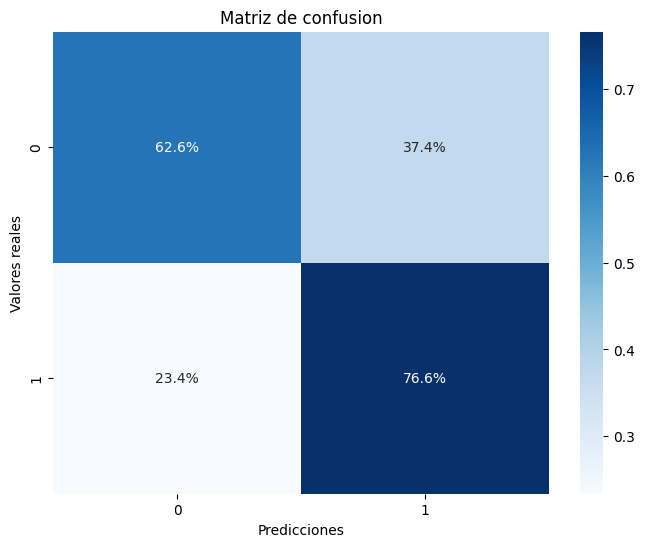

In [54]:
from sklearn.metrics import confusion_matrix

#Se escoge el modelo con solver "saga"
y_pred = models['saga'].predict(X_test)
matriz = confusion_matrix(y_test, y_pred)

#Se normaliza la matriz 
matriz_normalizada = matriz.astype('float') / matriz.sum(axis=1)[:, np.newaxis] 

plt.figure(figsize=(8, 6))
sns.heatmap(matriz_normalizada, annot=True, fmt='.1%', cmap='Blues')
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de confusion')
plt.show()

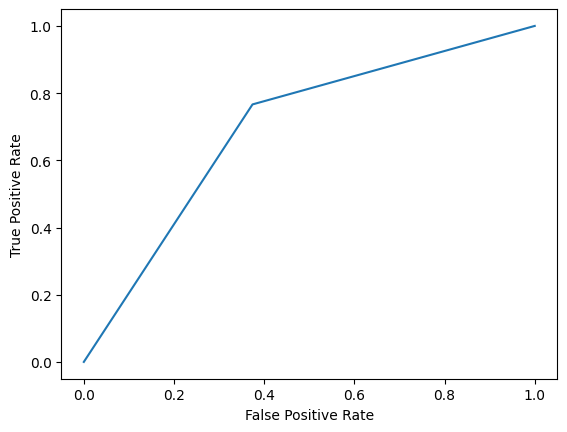

In [55]:
plot_roc_curve(y_test, y_pred)

## SVM

In [56]:
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
Cs = [0.1, 1, 10]
degrees = [2, 3, 4]

for kernel_ in kernels:
    for C in Cs:
        if kernel_ == 'poly':
            for degree_ in degrees:
                clf = make_pipeline(StandardScaler(with_mean=False), SVC(kernel=kernel_, C=C, degree=degree_))
                clf.fit(X_train, y_train)
                y_pred = clf.predict(X_test)
                acc = metrics.accuracy_score(y_test, y_pred)
                print(f'kernel = {kernel_}, con C = {C} con degree = {degree_}. La accuracy es: {acc}')
        else:
            clf = make_pipeline(StandardScaler(with_mean=False), SVC(kernel=kernel_, C=C))
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            acc = metrics.accuracy_score(y_test, y_pred)
            print(f'kernel = {kernel_}, con C = {C}. La accuracy es: {acc}')

kernel = linear, con C = 0.1. La accuracy es: 0.7232375979112271
kernel = linear, con C = 1. La accuracy es: 0.7258485639686684


kernel = linear, con C = 10. La accuracy es: 0.7258485639686684
kernel = poly, con C = 0.1 con degree = 2. La accuracy es: 0.6370757180156658
kernel = poly, con C = 0.1 con degree = 3. La accuracy es: 0.6344647519582245
kernel = poly, con C = 0.1 con degree = 4. La accuracy es: 0.6318537859007833
kernel = poly, con C = 1 con degree = 2. La accuracy es: 0.6788511749347258
kernel = poly, con C = 1 con degree = 3. La accuracy es: 0.6710182767624021
kernel = poly, con C = 1 con degree = 4. La accuracy es: 0.6344647519582245
kernel = poly, con C = 10 con degree = 2. La accuracy es: 0.6710182767624021
kernel = poly, con C = 10 con degree = 3. La accuracy es: 0.6762402088772846
kernel = poly, con C = 10 con degree = 4. La accuracy es: 0.6579634464751958
kernel = rbf, con C = 0.1. La accuracy es: 0.7232375979112271
kernel = rbf, con C = 1. La accuracy es: 0.7310704960835509
kernel = rbf, con C = 10. La accuracy es: 0.7075718015665796
kernel = sigmoid, con C = 0.1. La accuracy es: 0.72584856396

El mejor modelo de estos vendria siendo el linear con C = 0.1 

In [57]:
clf = make_pipeline(StandardScaler(with_mean=False), SVC(kernel='linear', C=0.1))
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.63      0.62       139
           1       0.79      0.78      0.78       244

    accuracy                           0.72       383
   macro avg       0.70      0.70      0.70       383
weighted avg       0.72      0.72      0.72       383



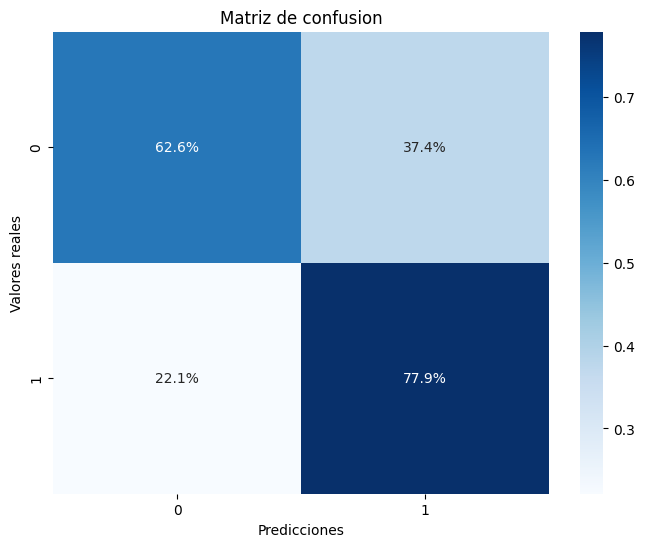

In [58]:
y_pred = clf.predict(X_test)
matriz = confusion_matrix(y_test, y_pred)

#Se normaliza la matriz 
matriz_normalizada = matriz.astype('float') / matriz.sum(axis=1)[:, np.newaxis] 

plt.figure(figsize=(8, 6))
sns.heatmap(matriz_normalizada, annot=True, fmt='.1%', cmap='Blues')
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de confusion')
plt.show()

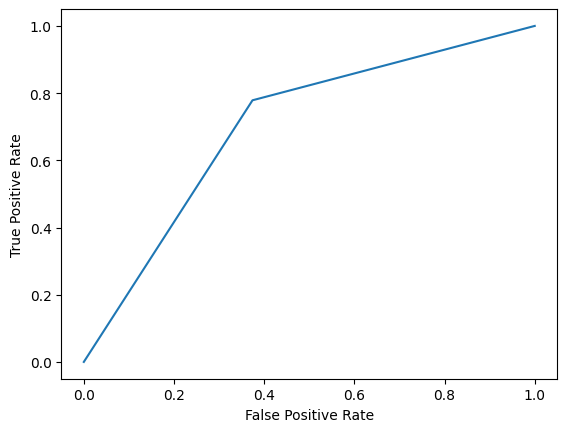

In [59]:
plot_roc_curve(y_test, y_pred)

## Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier

criterion = ["gini", "entropy", "log_loss"]
best_mean_accuracy = 0

for criterion_ in criterion:
      clf = make_pipeline(StandardScaler(), RandomForestClassifier(criterion=criterion_))
      clf.fit(X_train, y_train.ravel())
      y_pred = clf.predict(X_test)
      acc = metrics.accuracy_score(y_test.ravel(), y_pred)
      print(
          "For criterion =",
          criterion_,
          "The accuracy is :",
          acc,
      )
      if acc > best_mean_accuracy:
          best_mean_accuracy = acc
          best_criterion = criterion_

For criterion = gini The accuracy is : 0.7441253263707572
For criterion = entropy The accuracy is : 0.7284595300261096
For criterion = log_loss The accuracy is : 0.7336814621409922


In [61]:
best_mean_accuracy = 0
best_Deep = None
valores = [4,5,6,10,12,14,15,20,25,30,None]

for deep in valores:
    # Creamos el modelo DecisionTree con el valor actual de deep.
    svc = RandomForestClassifier(criterion=best_criterion, max_depth = deep)

    # Calculamos la precisión utilizando validación cruzada.
    accuracies = cross_val_score(svc, X_train, y_train.ravel(), cv=5, scoring='accuracy')
    mean_accuracy = np.mean(accuracies)
    print(f"Mean accuracy for deep={deep}: {mean_accuracy}")

    # Actualizamos la mejor precisión y el valor de deep si es necesario.
    if mean_accuracy > best_mean_accuracy:
        best_mean_accuracy = mean_accuracy
        best_Deep = deep

print(f"\nBest Deep is {best_Deep} with accuracy of {best_mean_accuracy}")

Mean accuracy for deep=4: 0.7145016138219099
Mean accuracy for deep=5: 0.7214809189291816
Mean accuracy for deep=6: 0.7214847161572052
Mean accuracy for deep=10: 0.7145092082779572
Mean accuracy for deep=12: 0.7171217011581545
Mean accuracy for deep=14: 0.7084336434402886
Mean accuracy for deep=15: 0.7110347446364154
Mean accuracy for deep=20: 0.7136434402885893
Mean accuracy for deep=25: 0.7162787165369281
Mean accuracy for deep=30: 0.7032086576798937
Mean accuracy for deep=None: 0.7049439908866527

Best Deep is 6 with accuracy of 0.7214847161572052


In [62]:
rfc_sbert = RandomForestClassifier(criterion=best_criterion, max_depth=best_Deep, n_estimators=150)

rfc_sbert.fit(X_train, y_train.ravel())

RandomForestClassifier(max_depth=6, n_estimators=150)

In [63]:
y_pred = rfc_sbert.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.63      0.63       139
           1       0.79      0.79      0.79       244

    accuracy                           0.73       383
   macro avg       0.71      0.71      0.71       383
weighted avg       0.73      0.73      0.73       383



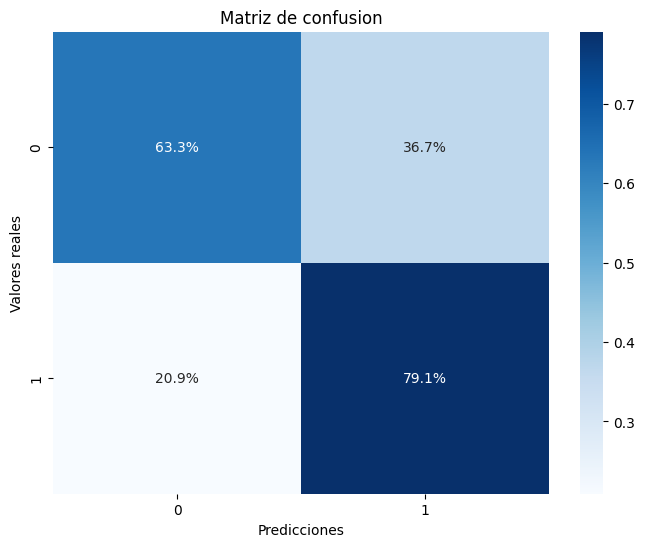

In [64]:
matriz = confusion_matrix(y_test, y_pred)

#Se normaliza la matriz 
matriz_normalizada = matriz.astype('float') / matriz.sum(axis=1)[:, np.newaxis] 

plt.figure(figsize=(8, 6))
sns.heatmap(matriz_normalizada, annot=True, fmt='.1%', cmap='Blues')
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de confusion')
plt.show()

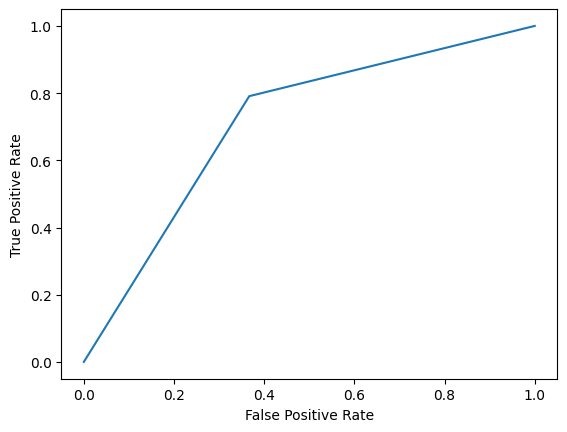

In [65]:
plot_roc_curve(y_test, y_pred)

# USAR SHAP PA EXPLICAR LOS MODELOS

In [30]:
to_explain = X_test.join(y_test).join(pd.DataFrame(y_pred, columns=['pred'], index=X_test.index)).reset_index(drop=True)
to_explain

AttributeError: 'numpy.ndarray' object has no attribute 'join'

In [ ]:
X_test

array([[ 4.11351424,  1.78723341, -1.61429281, ..., -0.19326642,
         0.11169789, -0.03954134],
       [-1.63432319, -1.45164876,  1.00177705, ..., -0.58710569,
         0.01838676, -0.24141749],
       [-3.13417188,  1.37292974,  0.07609347, ..., -0.36255567,
        -0.03038291, -0.27825031],
       ...,
       [-2.63144795, -0.4262974 , -1.87954037, ...,  0.05242161,
         0.41353302,  0.00510139],
       [ 1.76946266, -2.17562902,  1.88855806, ..., -0.69354463,
         0.82724457,  0.10487656],
       [ 2.70083979,  0.42737557, -1.770602  , ...,  0.79745886,
         0.29320411,  0.36159732]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_norm, target, test_size=0.25)

rfc = RandomForestClassifier(criterion=best_criterion, max_depth=best_Deep, n_estimators=150)
rfc.fit(X_train, y_train.ravel())

RandomForestClassifier(criterion='entropy', max_depth=30, n_estimators=150)

In [ ]:
to_explain = X_test.join(y_test).join(pd.DataFrame(y_pred, columns=['pred'], index=X_test.index)).reset_index(drop=True)
to_explain

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,WAS,NJN,SAS,POR,LAC,DAL,TOR,TOT,target,pred
0,-0.026074,0.814814,0.201866,0.704501,0.234037,0.123947,0.556984,-0.539493,-0.429904,-0.195963,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,1
1,-0.809312,0.526619,-0.672487,-0.219106,-0.401526,-0.338090,-0.208635,-0.103344,-0.050586,0.485614,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
2,0.757164,-0.914355,0.289301,-0.294791,-0.394304,-0.361358,-0.055511,-0.503147,-0.495303,0.101929,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,-1.592550,0.567790,-0.191593,0.548001,-0.141523,0.100679,-0.616966,1.241451,1.440523,0.552342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
4,-0.026074,-0.543819,-0.628769,-0.742484,-0.697641,-0.743619,0.471916,-0.503147,-0.364504,-0.062508,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,0.757164,-0.337965,-0.628769,-0.692455,-0.596528,-0.530882,-0.404294,-0.030652,0.014813,0.514212,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
379,0.757164,1.267692,-0.585051,1.061116,0.891266,0.692353,0.676081,-0.539493,-0.586863,-0.195963,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
380,-1.592550,-0.584989,-0.672487,-0.809189,-0.798753,-0.766887,-0.523390,-0.394110,-0.325264,0.256833,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
381,-0.026074,-1.367232,-0.672487,-1.045222,-0.935977,-0.919792,-0.965748,-0.539493,-0.547623,-0.195963,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1


In [ ]:
import shap

#to_explain = to_explain[to_explain['pred'] == 1]
np.bool = np.bool_

explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(to_explain)

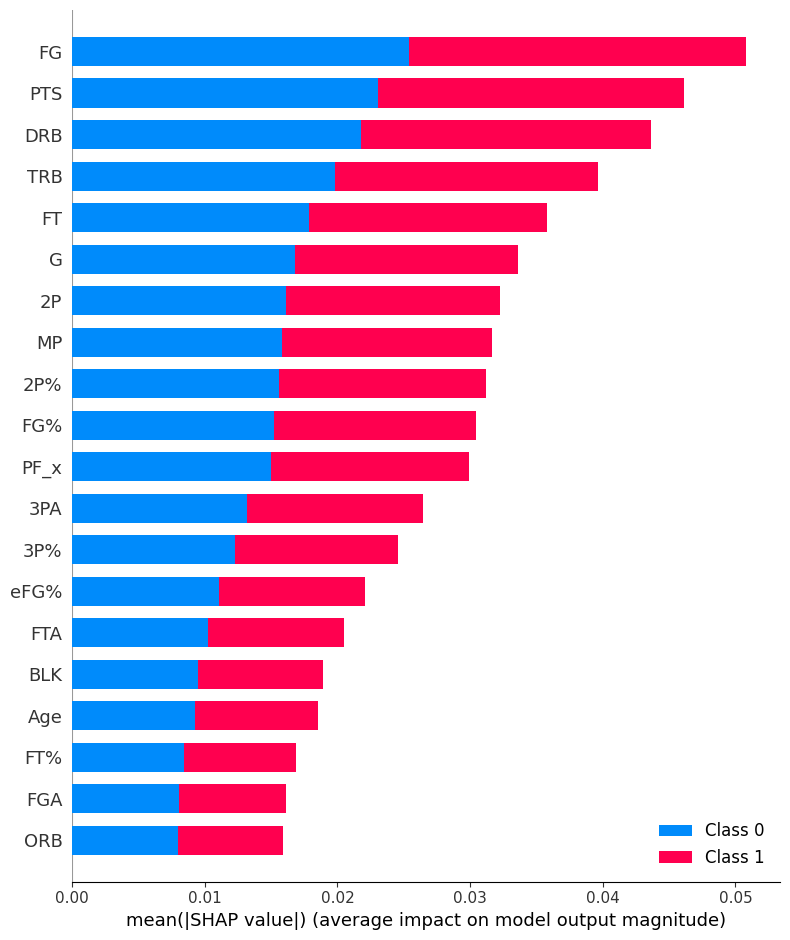

In [ ]:
shap.summary_plot(shap_values, to_explain, plot_type="bar")

In [ ]:
shap.initjs()
print(jugadores[1])
shap.force_plot(explainer.expected_value[1], shap_values[1][1,:], to_explain.iloc[1,:])

Noah Vonleh


In [ ]:
shap.force_plot(explainer.expected_value[1], shap_values[1][380,:], to_explain.iloc[380,:])

In [ ]:
shap.force_plot(explainer.expected_value[1], shap_values[1][381,:], to_explain.iloc[381,:])

In [ ]:
print(jugadores[10])
shap.force_plot(explainer.expected_value[1], shap_values[1][10,:], to_explain.iloc[10,:])

Eddie Griffin


## si es <0.5 entonces predice 1 y si es mayor predice 0